In [3]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
f=pd.read_csv('datasets_1923_3359_austin_weather.csv')
f.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
for n_cluster in [4,5,6,7,8]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        f[['TempHighF', 'TempAvgF', 'TempLowF']])
    
    silhouette_avg=silhouette_score(
        f[['TempHighF', 'TempAvgF', 'TempLowF']],
        kmeans.labels_)
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))
#///////////////////////////////////////////

Silhouette score for 4 Clusters :0.4730
Silhouette score for 5 Clusters :0.4597
Silhouette score for 6 Clusters :0.4167
Silhouette score for 7 Clusters :0.3798
Silhouette score for 8 Clusters :0.3710


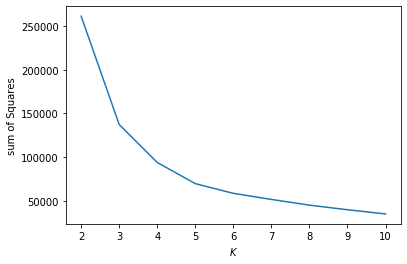

In [7]:
from sklearn import cluster
import numpy as np

sse=[]
krange = list(range(2,11))
X= f[['TempHighF', 'TempAvgF', 'TempLowF']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X)
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')
plt.show()